In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import sys

sys.path.append('/mnt/sdceph/users/nroy/radmc3d-2.0/python/radmc3dPy')
sys.path.append('/mnt/home/nroy/test/chimes-IGNIS/chimes-driver/ext-lib/pfh_python')


from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import cm
import matplotlib.patheffects as path_effects
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
from matplotlib.patches import Rectangle
import h5py as h5
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['axes.facecolor']='w'
;

''

In [2]:
'''KEYS'''
exclude_low_intensity = 1 
    # 0 - fullmass map, 1 - low intensity exclusion
half_mass = 0
    # 0 - fullmass map, 1 - halfmass map

In [54]:
''' READ IN OF DATA '''

'''
# m12i CO
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/0deg/CO_J10/"
parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/48deg/CO_J10/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/70deg/CO_J10/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/90deg/CO_J10/"
emission = "CO_J10"
intensity_mask = -7
text = r"$\mathbf{CO_{J10}}$"
#v_max = 2 #0
v_max = 12 #48
#v_max = 20 #70
#v_max = 20 #90
'''

'''
# m12i CII
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/0deg/CII_158mu/"
parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/48deg/CII_158mu/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/70deg/CII_158mu/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/90deg/CII_158mu/"
emission = "CII_158mu"
intensity_mask = -6
text = r"$\mathbf{[CII]_{158 \mu m}}$"
#v_max = 2 #0
v_max = 10 #48
#v_max = 15 #70
'''

'''
# m12i NII
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/0deg/NII_6585A/"
parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/48deg/NII_6585A/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/70deg/NII_6585A/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/90deg/NII_6585A/"
emission = "NII_6585A"
intensity_mask = -11
text = r"$\mathbf{[NII]_{6585A}}$"
#v_max = 2 #0
v_max = 10 #48
#v_max = 12 #70
#v_max = 12 #90
'''

'''
# m12i Halpha
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/0deg/Halpha/HI/"
parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/48deg/Halpha/HI/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/70deg/Halpha/HI/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/90deg/Halpha/HI/"
#parent_2 = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/0deg/Halpha/HII/"
parent_2 = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/48deg/Halpha/HII/"
#parent_2 = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/70deg/Halpha/HII/"
#parent_2 = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/90deg/Halpha/HII/"
emission = "Halpha"
intensity_mask = -6
text = r"$\mathbf{H \alpha}$"
v_max = 7
'''



'''
# m12i OIII
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/0deg/OIII_5007A/"
parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/48deg/OIII_5007A/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/70deg/OIII_5007A/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/90deg/OIII_5007A/"
emission = "OIII_5007A"
intensity_mask = -5
text = r"$\mathbf{[OIII]_{5007A}}$"
#v_max = 2 #0
v_max = 7 #48
#v_max = 10 #70
#v_max = 10 #90
'''


'''
# A4 CO
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/0deg/CO_J10/"
parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/48deg/CO_J10/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/70deg/CO_J10/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/90deg/CO_J10/"
emission = "CO_J10"
intensity_mask = -2
text = r"$\mathbf{CO_{J10}}$"
#v_max = 2 #0
v_max = 2 #48
#v_max = 2 #70
#v_max = 2 #90
'''


'''
# A4 CII
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/0deg/CII_158mu/"
parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/48deg/CII_158mu/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/70deg/CII_158mu/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/90deg/CII_158mu/"
emission = "CII_158mu"
intensity_mask = -2
text = r"$\mathbf{[CII]_{158 \mu m}}$"
#v_max = 2 #0
v_max = 2 #48
#v_max = 2 #70
#v_max = 2 #90
'''


'''
# A4 NII
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/0deg/NII_6548A/"
parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/48deg/NII_6548A/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/70deg/NII_6548A/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/90deg/NII_6548A/"
emission = "NII_6548A"
intensity_mask = -3
text = r"$\mathbf{[NII]_{6585A}}$"
#v_max = 2 #0
v_max = 5 #48
#v_max = 5 #70
#v_max = 5 #90
'''


# A4 Halpha
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/0deg/Halpha/HI/"
parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/48deg/Halpha/HI/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/70deg/Halpha/HI/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/90deg/Halpha/HI/"
#parent_2 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/0deg/Halpha/HII/"
parent_2 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/48deg/Halpha/HII/"
#parent_2 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/70deg/Halpha/HII/"
#parent_2 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/90deg/Halpha/HII/"
emission = "Halpha"
intensity_mask = -2
text = r"$\mathbf{H \alpha}$"
v_max = 10


'''
# A4 OIII
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/0deg/OIII_5007A/"
parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/48deg/OIII_5007A/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/70deg/OIII_5007A/"
#parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/90deg/OIII_5007A/"
emission = "OIII_5007A"
intensity_mask = -3
text = r"$\mathbf{[OIII]_{5007A}}$"
#v_max = 2 #0
v_max = 5 #48
#v_max = 5 #70
#v_max = 5 #90
'''


;

''

In [59]:
''' CALC MOMENT 0 '''

filepath_tot = parent + 'image_tot.hdf5'
filepath_con = parent + 'image_continuum.hdf5'
file_con = h5.File(filepath_con,'r')
file_tot = h5.File(filepath_tot,'r')

npix_x = np.shape(file_tot['image_array'][:])[0]
npix_y = np.shape(file_tot['image_array'][:])[1]

image_array = file_tot['image_array'][:] - file_con['image_array'][:]

image_array[image_array < 0] = 0

frequency_array = 3e8 / (file_tot['lambda_array'][:] * 1e-6)


# Uncomment For Halpha
filepath_tot_2 = parent_2 + 'image_tot.hdf5'
filepath_con_2 = parent_2 + 'image_continuum.hdf5'
file_con_2 = h5.File(filepath_con,'r')
file_tot_2 = h5.File(filepath_tot,'r')

npix_x_2 = np.shape(file_tot_2['image_array'][:])[0]
npix_y_2 = np.shape(file_tot_2['image_array'][:])[1]

image_array_2 = file_tot_2['image_array'][:] - file_con_2['image_array'][:]

image_array_2[image_array_2 < 0] = 0

frequency_array_2 = 3e8 / (file_tot_2['lambda_array'][:] * 1e-6)

image_array = image_array + image_array_2



#moment 0
integrated_image_array_moment0 = np.zeros((npix_x, npix_y))
delta_nu = np.abs(frequency_array[1:] - frequency_array[:-1])
for i in range(npix_x):
    for j in range(npix_y):
        integrated_image_array_moment0[i, j] = np.sum(delta_nu * (image_array[i, j, :-1] + image_array[i, j, 1:]) / 2.0)

integrated_image_array_moment0[0,0] = 0 #final moment 0 array
M0_arr = integrated_image_array_moment0

In [60]:
''' CALC MOMENT 1 '''

#moment 1
lambda_0_dict = {"Halpha": 0.65600490570068359, 
                 "CII_158mu": 157.62730407714844, 
                 "NII_6585A": 0.65807253122329712,
                 "NII_6548A": 0.6545339822769165,
                 "OIII_5007A": 0.50047838687896729, 
                 "CO_J10": 2600.757634}

lambda_0 = lambda_0_dict[emission]
lambda_array = np.array(file_con['lambda_array'])
velocity_arr = (lambda_array - lambda_0) * 3e5 / lambda_array 


moment1_noint = velocity_arr * image_array

integrated_image_array_moment1 = np.zeros((npix_x, npix_y))

for i in range(npix_x):
    for j in range(npix_y):
        integrated_image_array_moment1[i, j] = np.sum(delta_nu * (moment1_noint[i, j, :-1] + moment1_noint[i, j, 1:]) / 2.0)

isolate_moment_1 = integrated_image_array_moment1 / integrated_image_array_moment0
isolate_moment_1[0,0] = 0 #final moment 1 array
M1_arr = isolate_moment_1

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


In [61]:
''' CALC MOMENT 2 '''

#moment 2
isolate_moment_1_3D = np.empty([len(image_array), len(image_array), len(velocity_arr)])

for i in range(len(velocity_arr)):
    for j in range(len(image_array)):
        for k in range(len(image_array)):
            isolate_moment_1_3D[j][k][i] = isolate_moment_1[j][k]

moment2_noint = image_array * ((velocity_arr - isolate_moment_1_3D) * (velocity_arr - isolate_moment_1_3D))

integrated_image_array_moment2 = np.zeros((npix_x, npix_y))

for i in range(npix_x):
    for j in range(npix_y):
        integrated_image_array_moment2[i, j] = np.sum(delta_nu * (moment2_noint[i, j, :-1] + moment2_noint[i, j, 1:]) / 2.0)

integrated_image_array_moment2[0,0] = 0

isolate_moment_2 = integrated_image_array_moment2 / integrated_image_array_moment0
isolate_moment_2[0,0] = 0

isolate_moment_2 = np.sqrt(isolate_moment_2) #final moment 2 array
M2_arr = isolate_moment_2

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


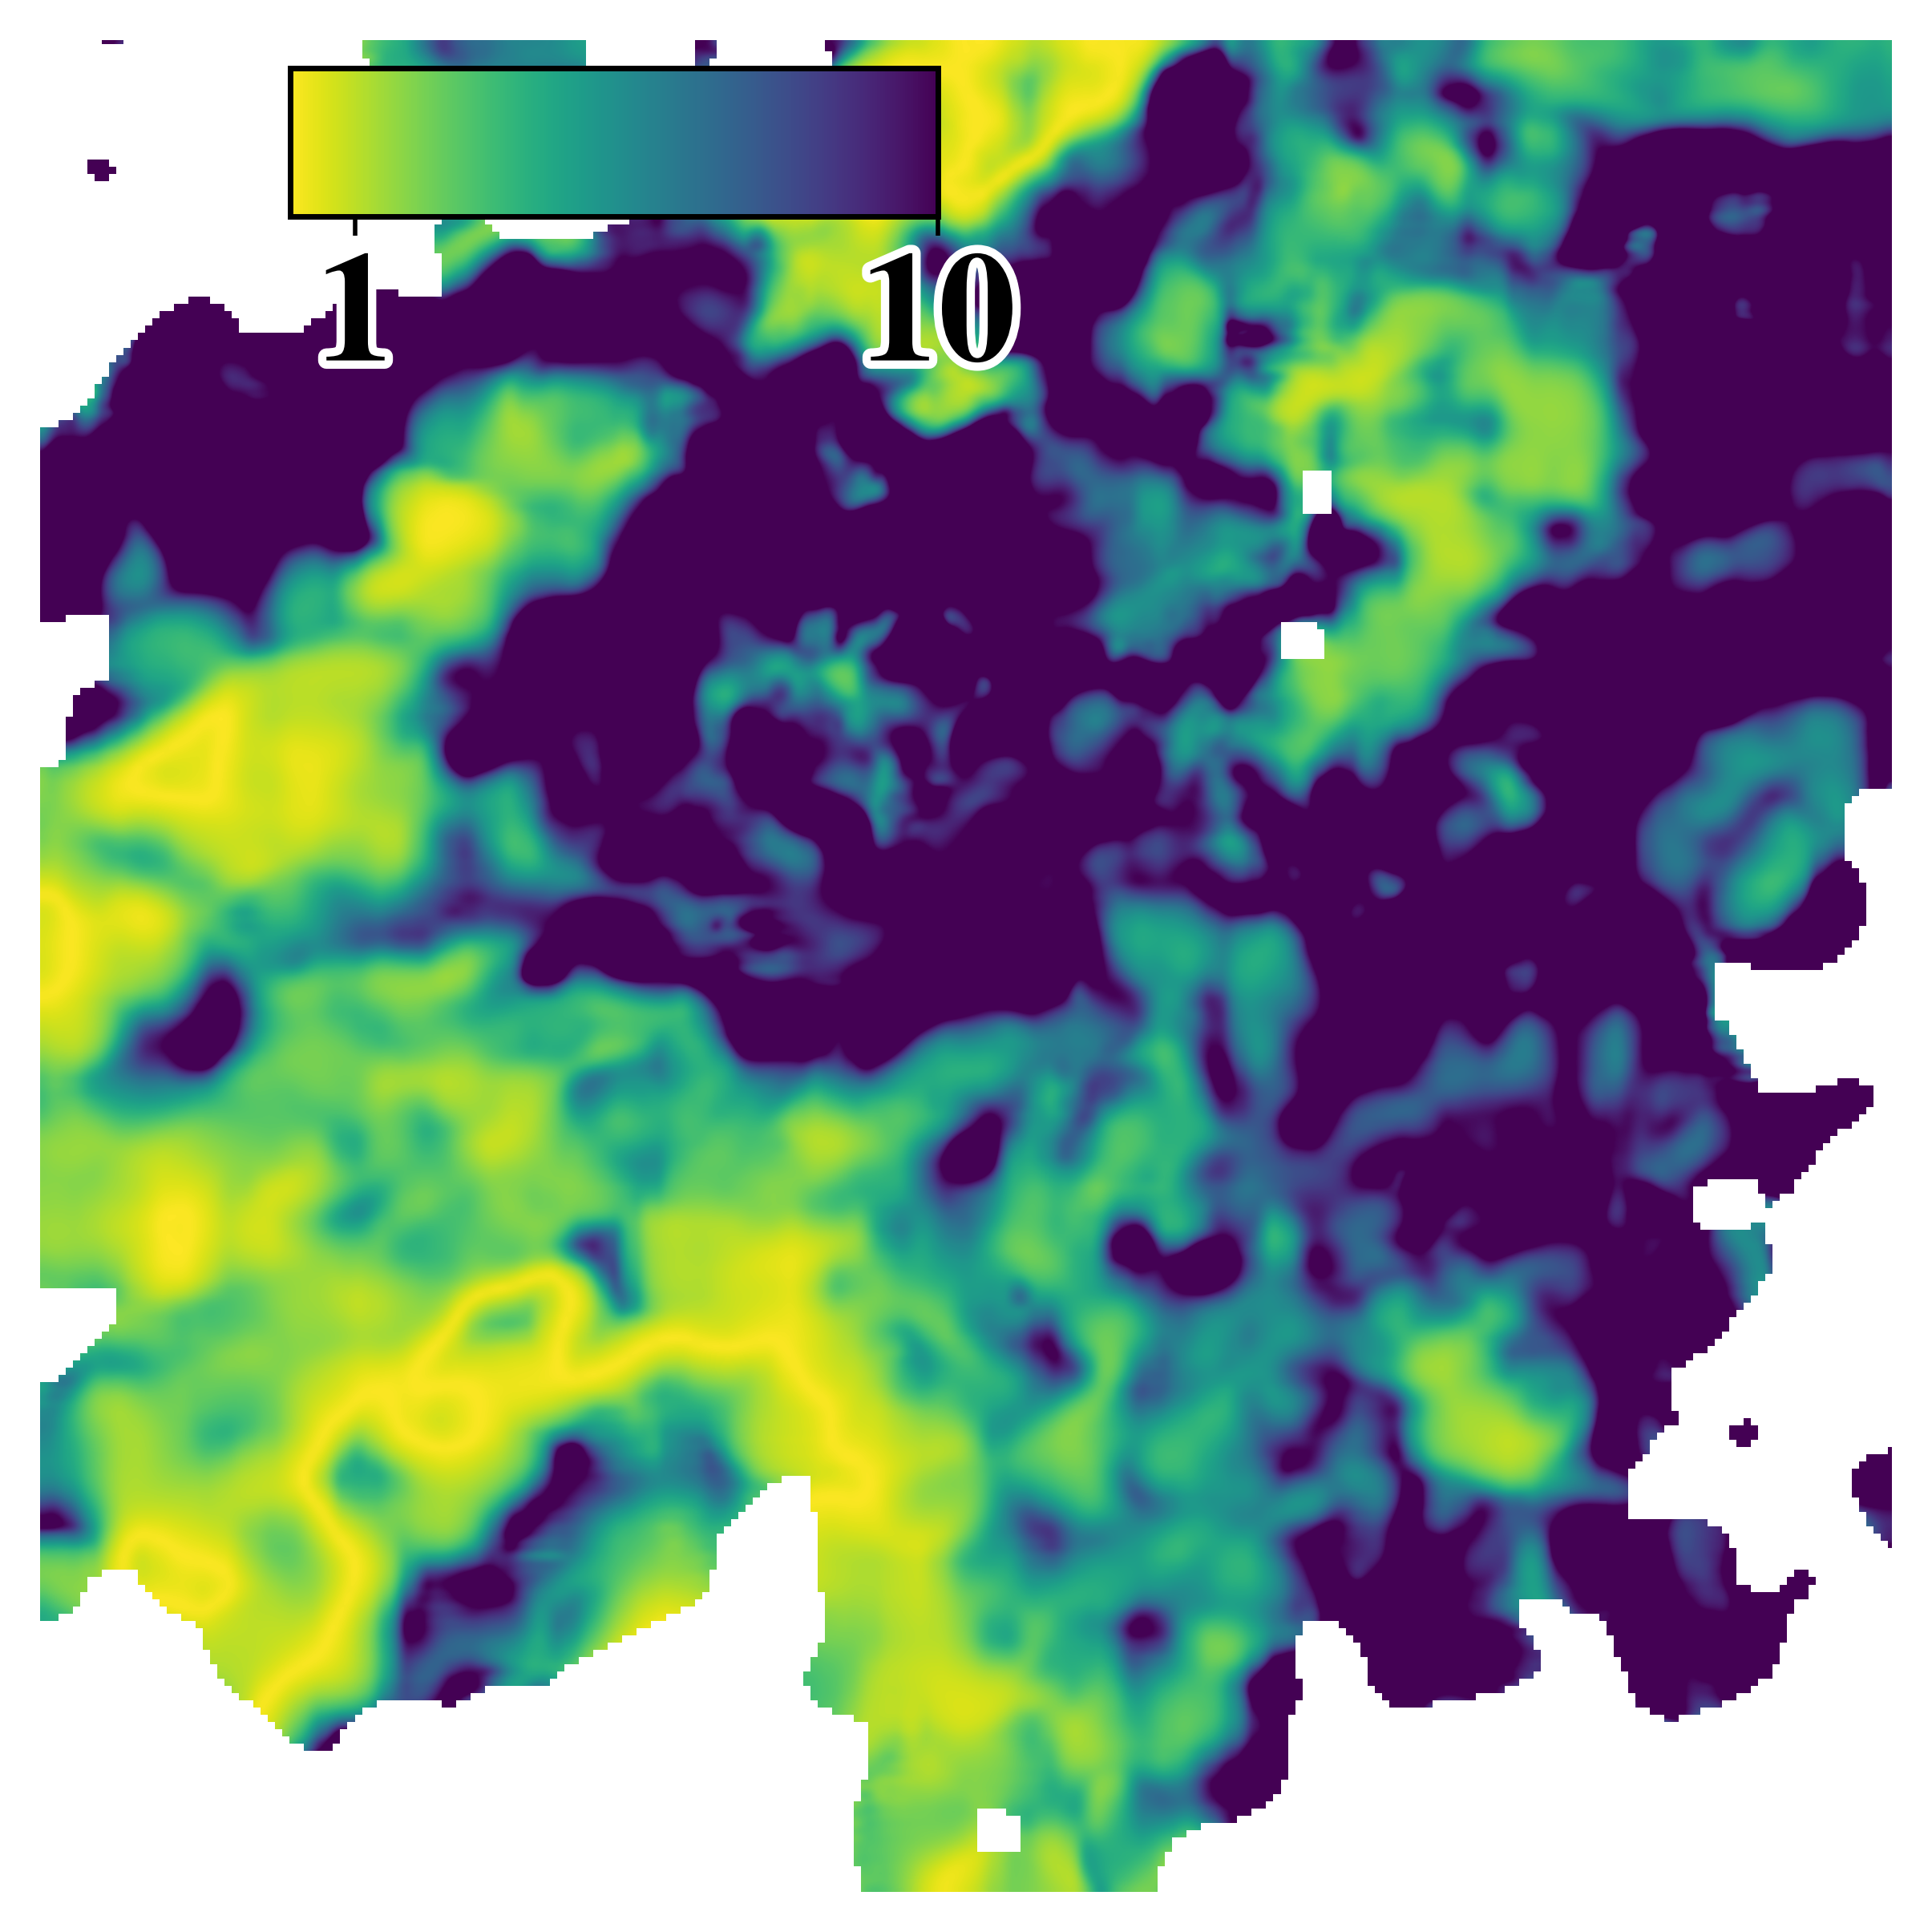

In [62]:
''' CALC SPATIALLY RESOLVED V/sigma AND PLOT '''

v_sigma = np.sqrt((M1_arr**2)/(M2_arr**2))

if half_mass == 1: 
    #r = 256 * (2*4.26/60) #m12i
    #r = 256 * (2*0.82/4) #A4-151
    #r = 256 * (2*0.86/4) #A4-152
    #r = 256 * (2*0.645/4) #A4-155
    midpointx = len(v_sigma) / 2
    midpointy = len(v_sigma[0]) / 2
    for i in range(len(v_sigma)):
        for j in range(len(v_sigma[i])):
            x = i - midpointx
            y = j - midpointy
            dist = np.sqrt(x**2 + y**2)
            if dist > (r + tolerance):
                v_sigma[i][j] = 0

                
if exclude_low_intensity == 1: 
    for i in range(len(M0_arr)):
        for j in range(len(M0_arr[i])):
            if np.log10(M0_arr[i][j]/np.max(M0_arr)) < intensity_mask:
                v_sigma[i][j] = np.nan

params = {"text.color" : 'k',
          "ytick.color" : "k",
          "xtick.color" : "k",
          "axes.labelcolor" : "k",
          "axes.edgecolor" : "k"}
plt.rcParams.update(params)

figx, figy = 8,6

fig, ax = plt.subplots(figsize=(figx,figy), dpi=500, facecolor='w') #change dpi to 500 for production runs
cmap = matplotlib.cm.hot.copy()
low = 'w'
cmap.set_bad(color = low)

plt.imshow(v_sigma.T, vmin = 0, vmax = v_max, extent=(-2,2,-2,2), \
           interpolation='bicubic', cmap='viridis_r', origin='lower')
plt.xlabel('X (kpc)', fontsize = 14)
plt.ylabel('Y (kpc)', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.axis('off')

#txt = plt.text(1.8, -1.5, text, fontsize = 40, fontweight = "bold", horizontalalignment="right")
cb = plt.colorbar() 
cb.remove()
colbar = 'k'
cbaxes = inset_axes(ax, width="70%", height="40%", bbox_to_anchor=(0.0,0.8,0.5,0.2), bbox_transform = ax.transAxes)  #change position
cbar = plt.colorbar(cax=cbaxes, orientation='horizontal')

cbar.set_ticks([1, v_max]) 
cbar.set_ticklabels(['1', v_max])

# Uncomment For Top Right Row Emission (CO in this case)
#cbar.set_label(label = r'$\mathbf{\sqrt{\frac{M_1^2}{M_2^2}}}$',\
#               size = 40, color="black", labelpad = 2)

fontprops1 = fm.FontProperties(size = 28, weight = "bold")

cbar.ax.tick_params(labelsize=25)
for label in cbar.ax.get_xticklabels():
    label.set_fontproperties(fontprops1)
    label.set_color("black")  # Set text color to black
    label.set_path_effects([path_effects.withStroke(linewidth=3, foreground="white")])

#txt.set_path_effects([path_effects.Stroke(linewidth=3, foreground='white'), path_effects.Normal()])

cbar.outline.set_color("k")
cbar.outline.set_linewidth(1)
cbar.ax.xaxis.set_tick_params(color="k")

plt.savefig('spatial_vsigma_A4_Halpha_48.png', bbox_inches='tight', pad_inches = 0)
plt.show()